In [19]:
#%matplotlib notebook
%matplotlib inline
from matplotlib import rc
rc('figure',figsize=(13,7))
rc('font',size=12)
rc('text',usetex=False)

from qubicpack import qubicpack as qp
import fibtools as ft
import plotters as p

import numpy as np
from matplotlib.pyplot import *
import matplotlib.mlab as mlab
import scipy.ndimage.filters as f
import glob
import string

Get the directories corresponding to the day we consider:

In [20]:
day = '2019-02-22'
data_dir = '/qubic/Data/Calib-TD/'+day+'/'
dirs = glob.glob(data_dir+'/*')
dirs

['/qubic/Data/Calib-TD/2019-02-22/2019-02-22_16.28.01__Scan2',
 '/qubic/Data/Calib-TD/2019-02-22/2019-02-22_16.11.38__Scan1']

In [21]:
labels = []
for d in dirs:
    bla = str.split(d,'__')
    print bla
    labels.append(bla[1])
labels

['/qubic/Data/Calib-TD/2019-02-22/2019-02-22_16.28.01', 'Scan2']
['/qubic/Data/Calib-TD/2019-02-22/2019-02-22_16.11.38', 'Scan1']


['Scan2', 'Scan1']

So we first look at pixel 63 in ASIC2 in first dataset (Source_scan1). Same pixel as Michel did on QubicStudio

In [22]:
thedir = dirs[0]
a = qp()
a.read_qubicstudio_dataset(thedir, asic=2)
nsamples = len(a.timeline(TES=63))
pow2 = int(np.log(nsamples)/np.log(2))
ns = 2**pow2
FREQ_SAMPLING = 1./a.sample_period()
t_data = a.timeline_timeaxis(0,axistype='index')
print(nsamples)

t_az, azinit = ft.read_hkintern(thedir,thefieldname='Platform-Azimut')
az = (azinit-2.**15)/2.**16*360


Reading data for ASIC 2
reading fits file: /qubic/Data/Calib-TD/2019-02-22/2019-02-22_16.28.01__Scan2/Sums/science-asic2-2019.02.22.162801.fits
Reading QubicStudio FITS file: /qubic/Data/Calib-TD/2019-02-22/2019-02-22_16.28.01__Scan2/Sums/science-asic2-2019.02.22.162801.fits
Guessing the detector array is: P87
reading fits file: /qubic/Data/Calib-TD/2019-02-22/2019-02-22_16.28.01__Scan2/Hks/hk-intern-2019.02.22.162801.fits
Reading QubicStudio FITS file: /qubic/Data/Calib-TD/2019-02-22/2019-02-22_16.28.01__Scan2/Hks/hk-intern-2019.02.22.162801.fits
reading fits file: /qubic/Data/Calib-TD/2019-02-22/2019-02-22_16.28.01__Scan2/Hks/conf-asics-2019.02.22.162801.fits
Reading QubicStudio FITS file: /qubic/Data/Calib-TD/2019-02-22/2019-02-22_16.28.01__Scan2/Hks/conf-asics-2019.02.22.162801.fits
There are 1016 housekeeping measurements in the period 2019-02-22 15:28:05 to 2019-02-22 16:53:20
WARNING!  Assuming Raw-mask did not change during the measurement.
          You can check by looking at

(-13.524169921875, 14.3646240234375)


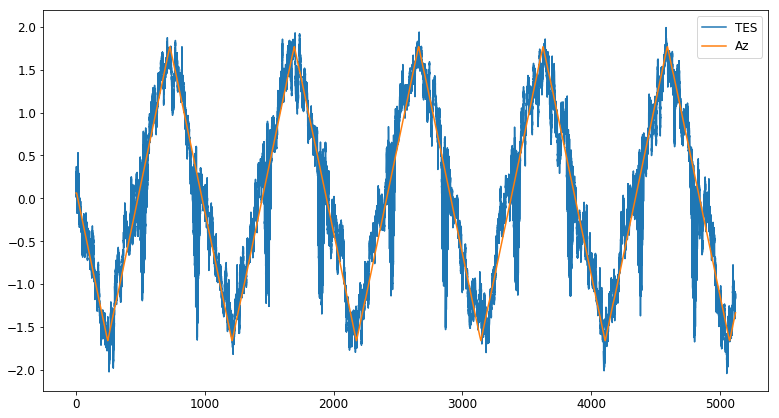

In [39]:
TESnum = 63
data = a.timeline(TES=TESnum)
plot(t_data,(data-np.mean(data))/np.std(data),label='TES')
plot(t_az-min(t_az), (az-np.mean(az))/np.std(az),label='Az')
legend()
print(np.min(az),np.max(az))

thedata = data - f.gaussian_filter1d(data, 1000)

Text(0,0.5,'Data')

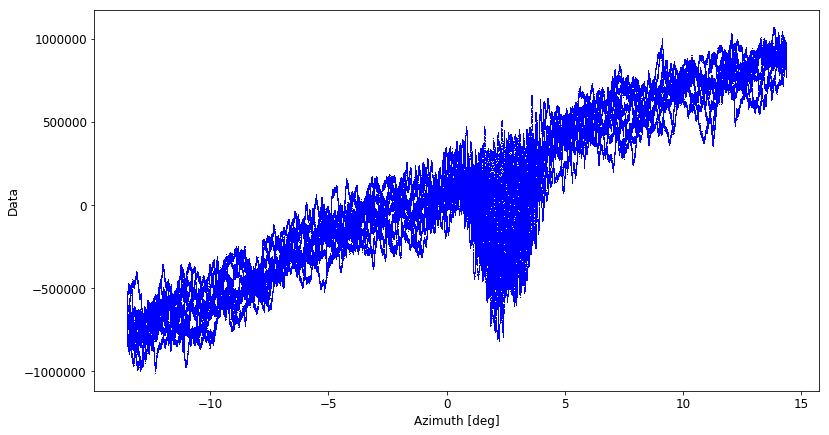

In [24]:
new_az = np.interp(t_data, t_az-min(t_az), az)
plot(new_az, data,'b,')
xlabel('Azimuth [deg]')
ylabel('Data')

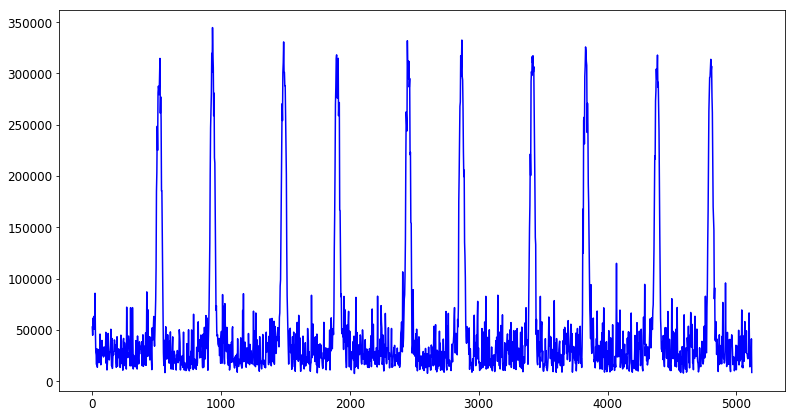

In [25]:
ppp = 3.
period = ppp*(t_data/int(ppp)).astype(int)
allperiods = np.unique(period)
tper = np.zeros(len(allperiods))
azper = np.zeros(len(allperiods))
ampdata = np.zeros(len(allperiods))
for i in xrange(len(allperiods)):
    ok = (period == allperiods[i])
    azper[i] = np.mean(new_az[ok])
    tper[i] = np.mean(t_data[ok])
    ampdata[i] = np.std(data[ok])
plot(tper,ampdata,'b')

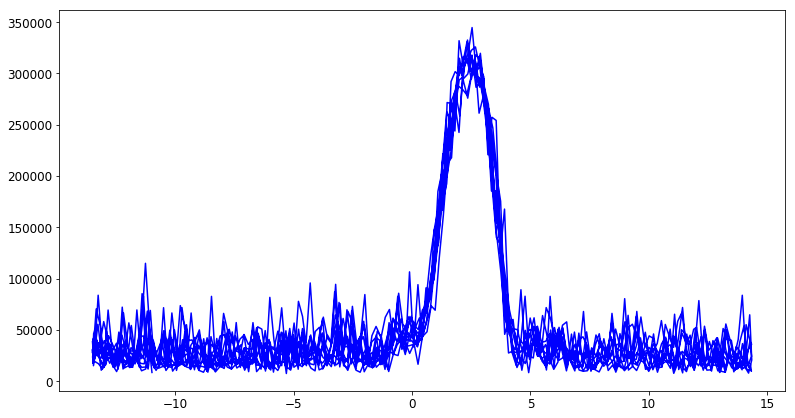

In [26]:
plot(azper,ampdata,'b')

139


FCN = 380.719164863 
 TOTAL NCALL = 201 
 NCALLS = 201 
 
 
 EDM = 1.27941192252e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,c0,2.293001e+00,1.159683e-02,0.000000e+00,0.000000e+00,,,
2,c1,8.195478e-01,6.542984e-03,0.000000e+00,0.000000e+00,,,
3,c2,3.841132e+05,1.999998e+00,0.000000e+00,0.000000e+00,,,
4,c3,2.659483e+04,1.999954e+00,0.000000e+00,0.000000e+00,,,


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,c0,2.293001e+00,1.159679e-02,0.000000e+00,0.000000e+00,,,
2,c1,8.195478e-01,6.542966e-03,0.000000e+00,0.000000e+00,,,
3,c2,3.841132e+05,1.999998e+00,0.000000e+00,0.000000e+00,,,
4,c3,2.659483e+04,1.999954e+00,0.000000e+00,0.000000e+00,,,


+,c0,c1,c2,c3
c0,1.00,0.20,0.00,-0.00
c1,0.20,1.00,-0.00,-0.00
c2,0.00,-0.00,1.00,0.00
c3,-0.00,-0.00,0.00,1.00


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log10


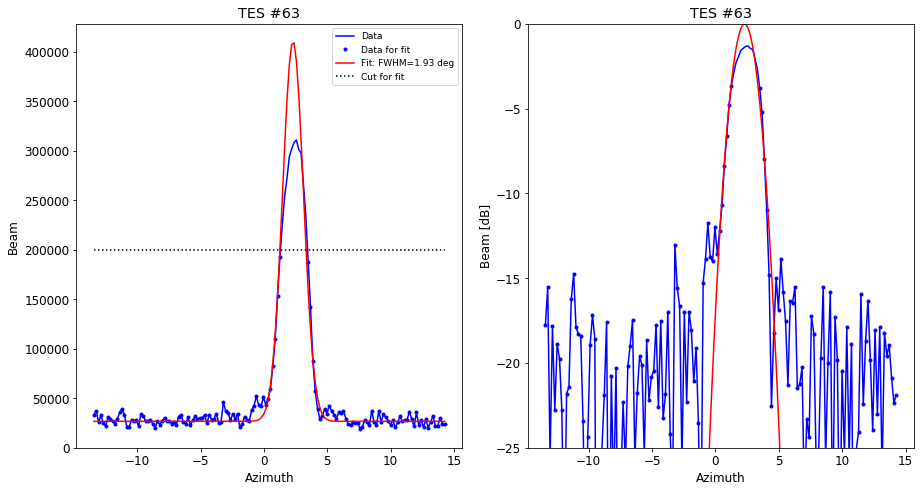

In [27]:
nbins = 150
azfinalbins = min(azper)+(max(azper)-min(azper))*np.linspace(0,1,nbins+1)
azfinal = np.zeros(nbins)
ampfinal = np.zeros(nbins)
err_ampfinal = np.zeros(nbins)
for i in xrange(nbins):
    ok = (azper >= azfinalbins[i]) & (azper < azfinalbins[i+1])
    azfinal[i] = 0.5 * (azfinalbins[i] + azfinalbins[i+1])
    ampfinal[i] = np.mean(ampdata[ok])
    err_ampfinal[i] = np.std(ampdata[ok])/np.sqrt(ok.sum())

def gauss(x,par):
    return par[3]+par[2]*np.exp(-0.5 * (x-par[0])**2 / par[1]**2)

thecut = 200000
okfit = (ampfinal < thecut) & (err_ampfinal != 0)
print(okfit.sum())
guess = np.array([3., 2., np.max(ampfinal)-np.min(ampfinal), np.min(ampfinal)])
res = ft.do_minuit(azfinal[okfit], ampfinal[okfit], err_ampfinal[okfit], guess, functname=gauss, verbose=False)


subplot(1,2,1)
plot(azfinal, ampfinal,'b',label='Data')
plot(azfinal[okfit], ampfinal[okfit],'b.',label='Data for fit')
plot(azfinal, gauss(azfinal, res[1]), 'r', label='Fit: FWHM={0:4.2f} deg'.format(res[1][1]*2.35))
plot(azfinal, azfinal*0+thecut, 'k:',label='Cut for fit')
xlabel('Azimuth')
ylabel('Beam')
title('TES #{}'.format(TESnum))
legend(fontsize=9)

ampfinaldB = 10 * np.log10(np.abs((ampfinal-res[1][3])/res[1][2]))
subplot(1,2,2)
plot(azfinal, ampfinaldB,'b')
plot(azfinal[okfit], ampfinaldB[okfit],'b.')
plot(azfinal, 10*np.log10((gauss(azfinal, res[1])-res[1][3])/res[1][2]), 'r', label='Fit')
xlabel('Azimuth')
ylabel('Beam [dB]')
title('TES #{}'.format(TESnum))
ylim(-25,0)
tight_layout()

['/qubic/Data/Calib-TD/calsource/calsource_20190222T150113.dat'
 '/qubic/Data/Calib-TD/calsource/calsource_20190222T161710.dat'
 '/qubic/Data/Calib-TD/calsource/calsource_20190222T164144.dat']


(-1, 1)

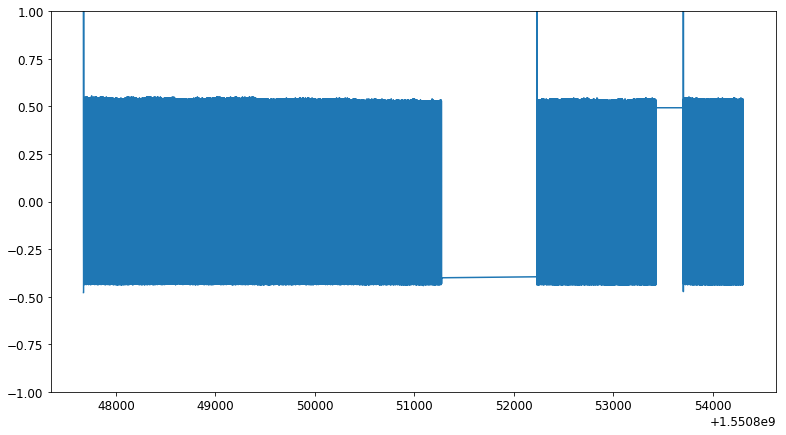

In [74]:
fcalsrc = np.sort(glob.glob('/qubic/Data/Calib-TD/calsource/calsource_20190222*'))
print fcalsrc
tt = []
dd = []
for ff in fcalsrc:
    thett, thedd = np.loadtxt(ff).T
    tt.append(thett)
    dd.append(thedd)

tt = np.concatenate(tt)
dd = np.concatenate(dd)
tt += 3600
dd = (dd-np.mean(dd))/np.std(dd)
plot(tt,dd)
ylim(-1,1)

(4790, 4800)

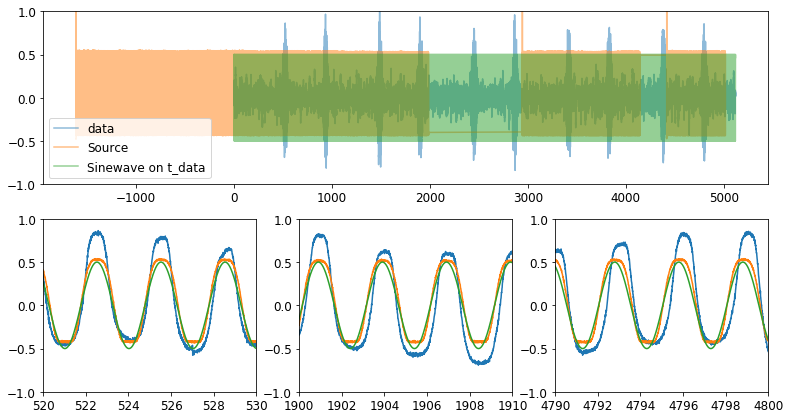

In [97]:

fct = np.sin((t_data+0.75)*2*np.pi/(1./0.333))/2

shift = -0.45
subplot(2,1,1)
plot(t_data, thedata/np.max(thedata), alpha=0.5, label='data')
plot(tt-np.min(t_az)-shift, dd, alpha=0.5, label='Source')
plot(t_data, fct, alpha=0.5, label='Sinewave on t_data')
ylim(-1,1)
legend(loc='lower left')

subplot(2,3,4)
plot(t_data, thedata/np.max(thedata))
plot(tt-np.min(t_az)-shift, dd)
plot(t_data, fct)
ylim(-1,1)
xlim(520,530)

subplot(2,3,5)
plot(t_data, thedata/np.max(thedata))
plot(tt-np.min(t_az)-shift, dd)
plot(t_data, fct)
ylim(-1,1)
xlim(1900,1910)

subplot(2,3,6)
plot(t_data, thedata/np.max(thedata))
plot(tt-np.min(t_az)-shift, dd)
plot(t_data, fct)
ylim(-1,1)
xlim(4790,4800)
